In [2]:
# IMPORTING LIBRARIES

import pandas as pd
import matplotlib.pyplot as plt
import os
import seaborn as sns

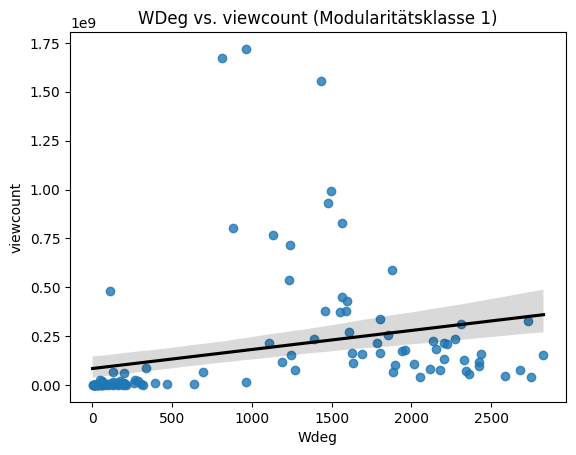

In [3]:
# ========================================================
# TAYLOR SWIFT MODGROUP 1 VIS CORRELATION VIEWCOUNT + WDEG
# ========================================================

base_dir = os.getcwd()
file_path = os.path.join(base_dir, "data/TSmod1viewsWdeg.csv")
df = pd.read_csv(file_path)
df.columns = df.columns.str.strip()
#Spalten in numerisch konvertieren
df["viewcount"] = pd.to_numeric(df["viewcount"], errors='coerce')
df["Weighted Degree"] = pd.to_numeric(df["Weighted Degree"], errors='coerce')

# plot
plt.figure()
# plt.scatter(
#     df["Weighted Degree"],
#     df["viewcount"]
# )
sns.regplot(x="Weighted Degree", y="viewcount", data = df, line_kws={"color": "black"})

plt.xlabel("Wdeg")
plt.ylabel("viewcount")
plt.title("WDeg vs. viewcount (Modularitätsklasse 1)")
plt.show()


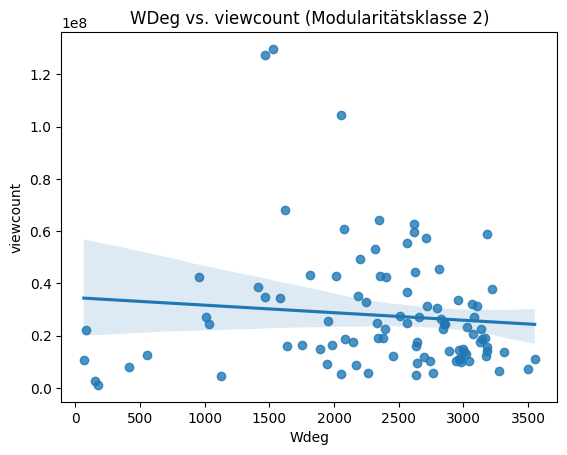

In [4]:
# ========================================================
# TAYLOR SWIFT MODGROUP 2 VIS CORRELATION VIEWCOUNT + WDEG
# ========================================================

base_dir = os.getcwd()
file_path = os.path.join(base_dir, "data/TSmod2viewsWdeg.csv")
df = pd.read_csv(file_path)
df.columns = df.columns.str.strip()
#Spalten in numerisch konvertieren
df["viewcount"] = pd.to_numeric(df["viewcount"], errors='coerce')
df["Weighted Degree"] = pd.to_numeric(df["Weighted Degree"], errors='coerce')

# plot
plt.figure()
# plt.scatter(
#     df["Weighted Degree"],
#     df["viewcount"]
# )
sns.regplot(x="Weighted Degree", y="viewcount", data = df)

plt.xlabel("Wdeg")
plt.ylabel("viewcount")
plt.title("WDeg vs. viewcount (Modularitätsklasse 2)")
plt.show()


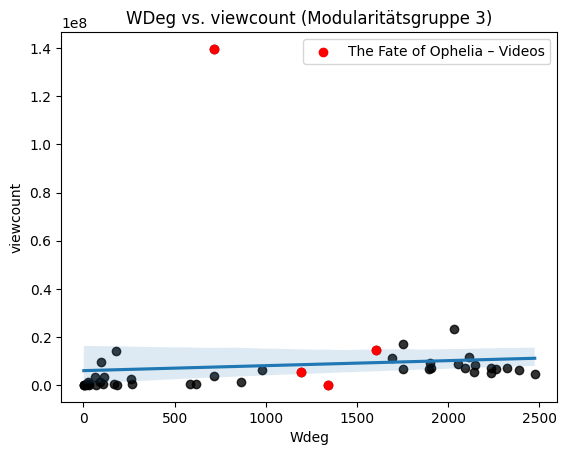

In [5]:
# =====================================================================
# TAYLOR SWIFT MODGROUP 3 VIS FATE OF OPHELIA CO-COMMENTING FREQUENCIES
# =====================================================================

base_dir = os.getcwd()
file_path = os.path.join(base_dir, "data/TSmodgroup3.csv")
df = pd.read_csv(file_path)
df.columns = df.columns.str.strip()
#Spalten in numerisch konvertieren
df["viewcount"] = pd.to_numeric(df["viewcount"], errors='coerce')
df["Weighted Degree"] = pd.to_numeric(df["Weighted Degree"], errors='coerce')


special_nodes = ["Taylor Swift - The Fate of Ophelia (Visualizer)",
                "Taylor Swift - The Fate of Ophelia (The Chainsmokers Remix) (Visualizer)",
                "Taylor Swift - The Fate of Ophelia (Lyric Video)",
                "Taylor Swift - The Fate of Ophelia (Official Music Video)"]

mask = df["Label"].isin(special_nodes)

plt.figure()

# Alle Nodes (grau, OHNE Legende)
sns.regplot(
    x="Weighted Degree",
    y="viewcount",
    data=df,
    scatter_kws={"color": "black", "label": "_nolegend_"},
    line_kws={"label": "_nolegend_"}
)

# Hervorgehobene Nodes (MIT Legende)
plt.scatter(
    df.loc[mask, "Weighted Degree"],
    df.loc[mask, "viewcount"],
    color="red",
    label="The Fate of Ophelia – Videos"
)

plt.xlabel("Wdeg")
plt.ylabel("viewcount")
plt.title("WDeg vs. viewcount (Modularitätsgruppe 3)")
plt.legend(loc="upper right")
plt.show()



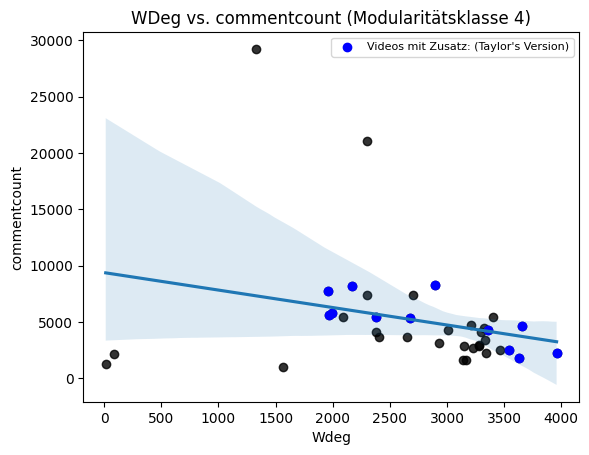

In [6]:
# =====================================================
# TAYLOR SWIFT MODGROUP 4 VIS CORRELATION COMMENTS-WDEG
# =====================================================
base_dir = os.getcwd()
file_path = os.path.join(base_dir, "data/TSmodgroup4.csv")
df = pd.read_csv(file_path)
df.columns = df.columns.str.strip()
#Spalten in numerisch konvertieren
df["commentcount"] = pd.to_numeric(df["commentcount"], errors='coerce')
df["Weighted Degree"] = pd.to_numeric(df["Weighted Degree"], errors='coerce')

kw = "(Taylor s Version)"

mask = df["Label"].str.contains(
    kw,
    regex=False
)
sns.regplot(x="Weighted Degree", y="commentcount", data = df, scatter_kws={"color": "black", "label": "_nolegend_"},
    line_kws={"label": "_nolegend_"})
# Alle Nodes (grau)
# plt.scatter(
#     df["Weighted Degree"],
#     df["commentcount"],
#     color="black"
# )

# Hervorgehobene Nodes
plt.scatter(
    df.loc[mask, "Weighted Degree"],
    df.loc[mask, "commentcount"],
    color="blue",
    label="Videos mit Zusatz: (Taylor's Version)"
)

plt.xlabel("Wdeg")
plt.ylabel("commentcount")
plt.legend(loc="best", prop={'size': 8})
plt.title("WDeg vs. commentcount (Modularitätsklasse 4)")
plt.show()

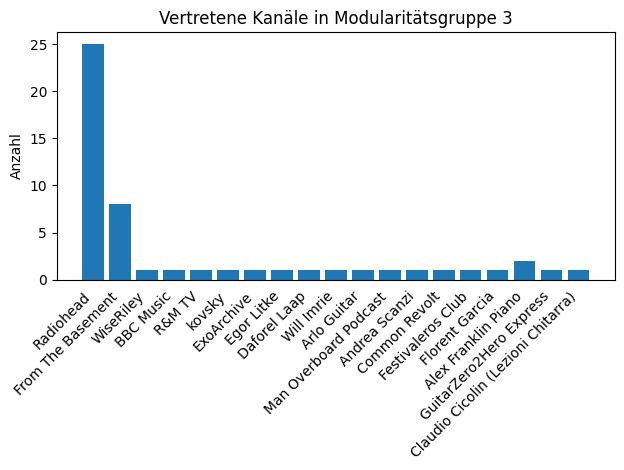

In [8]:
# =============================================
# RADIOHEAD MODGROUP 3 VIS CHANNEL DISTRIBUTION
# =============================================
from collections import Counter
import numpy as np
base_dir = os.getcwd()
file_path = os.path.join(base_dir, "data/RHmodgroup3channelDis.csv")
df = pd.read_csv(file_path)
df.columns = df.columns.str.strip()

channels=[]

for i in df["channeltitle"]:
    channels.append(i)
channels = Counter(channels)
channel_counts = channels.values()
y_pos = np.arange(len(channel_counts))
channel_names = channels.keys()
plt.bar(y_pos, channel_counts, align='center')
plt.xticks(y_pos, channel_names, rotation=45, ha="right")
plt.ylabel('Anzahl')
plt.title('Vertretene Kanäle in Modularitätsgruppe 3')
plt.tight_layout()
# Striche auf x-Achse ausschalten
plt.tick_params(
    axis='x',
    which='both', #major und minor ticks
    bottom=False  # ticks auf der x-Achse (unten)
)
plt.show()

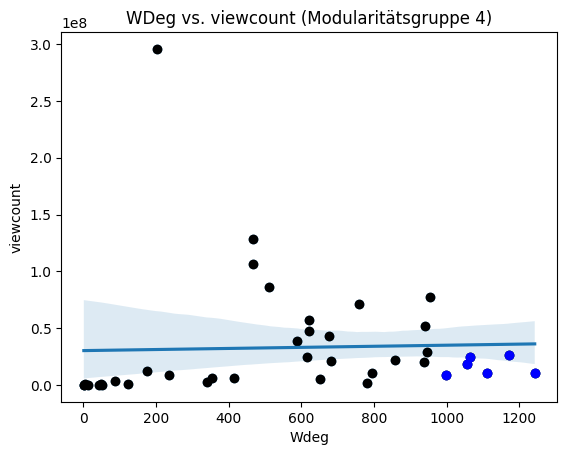

In [9]:
# ===============================================
# RADIOHEAD MODGROUP 4 CORRELATION WDEG VIEWCOUNT
# ===============================================

base_dir = os.getcwd()
file_path = os.path.join(base_dir, "data/RHmodgroup4viewsWdeg.csv")
df = pd.read_csv(file_path)
df.columns = df.columns.str.strip()

#Spalten in numerisch konvertieren
df["viewcount"] = pd.to_numeric(df["viewcount"], errors='coerce')
df["Weighted Degree"] = pd.to_numeric(df["Weighted Degree"], errors='coerce')

special_nodes = df["Weighted Degree"] > 990


plt.figure()
sns.regplot(x="Weighted Degree", y="viewcount", data = df)
# Alle Nodes
plt.scatter(
    df["Weighted Degree"],
    df["viewcount"],
    color="black"
)

# hervorgehobene Nodes 

plt.scatter(
    df.loc[special_nodes, "Weighted Degree"],
    df.loc[special_nodes, "viewcount"],
    color="blue"
)

plt.xlabel("Wdeg")
plt.ylabel("viewcount")
plt.title("WDeg vs. viewcount (Modularitätsgruppe 4)")
plt.show()

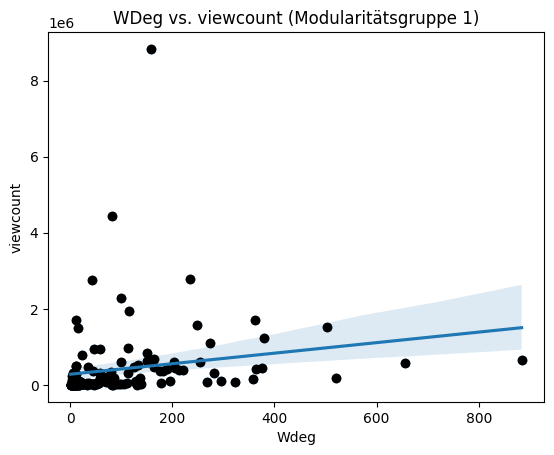

In [10]:
# ===============================================
# RADIOHEAD MODGROUP 1 CORRELATION WDEG VIEWCOUNT
# ===============================================

base_dir = os.getcwd()
file_path = os.path.join(base_dir, "data/RHmodgroup1viewsWdeg.csv")
df = pd.read_csv(file_path)
df.columns = df.columns.str.strip()

#Spalten in numerisch konvertieren
df["viewcount"] = pd.to_numeric(df["viewcount"], errors='coerce')
df["Weighted Degree"] = pd.to_numeric(df["Weighted Degree"], errors='coerce')


plt.figure()
sns.regplot(x="Weighted Degree", y="viewcount", data = df)

# Alle Nodes
plt.scatter(
    df["Weighted Degree"],
    df["viewcount"],
    color="black"
)

# hervorgehobene Nodes 

# plt.scatter(
#     df.loc[special_nodes, "Weighted Degree"],
#     df.loc[special_nodes, "viewcount"],
#     color="blue"
# )

plt.xlabel("Wdeg")
plt.ylabel("viewcount")
plt.title("WDeg vs. viewcount (Modularitätsgruppe 1)")
plt.show()

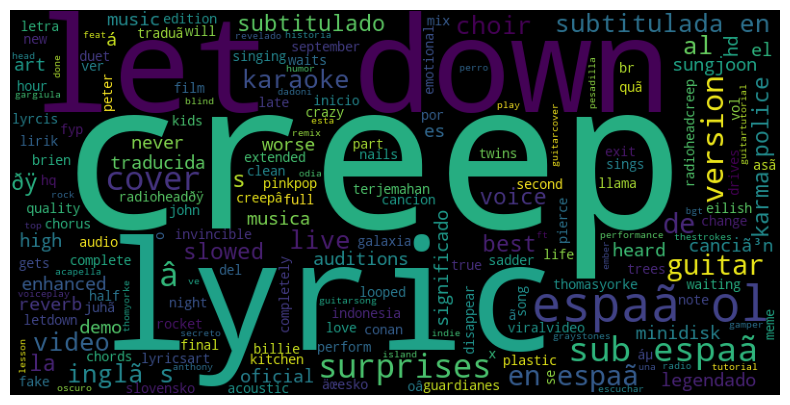

In [12]:
# ========================================
# RADIOHEAD MODGROUP 2 WORDCLOUD FOR CREEP
# ========================================
import re
from wordcloud import STOPWORDS
from wordcloud import WordCloud
import unicodedata as ucd
import matplotlib.pyplot as plt
import pandas as pd
df = pd.read_csv("data/RHmod2labels.csv")

text = ' '.join(df['Label'].astype(str).tolist())
text = text.lower()

stopwords = set(STOPWORDS)
own_stopwords = ["radiohead"]

stopwords.update(own_stopwords)
stopwords.remove("down")

wordcloud = WordCloud(width=800, height=400, background_color='black', stopwords=stopwords).generate(text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='auto')
plt.axis('off')
plt.show()